In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_charts():
    # test with 3/4 inch sleeve diameter
    # muscle length in inches; 0psi lift from ground in inches; weight in pounds; weight lift distance in inches from ground
    data = [
        # -- 9 inch tube
        [9, 17.25, 0, 19.5],
        [9, 17.375, 2.5, 19.375],
        [9, 17.125, 5, 19.25],
        [9, 17.125, 7.5, 19.125],
        [9, 17.125, 10, 19],
        [9, 17.125, 15, 18.875],
        [9, 17.125, 20, 18.625],
        [9, 17.125, 25, 18.5],
        [9, 17, 30, 17.875],

        # -- 10 inch tube
        [10, 16.5, 0, 18.75],
        [10, 16.375, 2.5, 18.5],
        [10, 16.375, 5, 18.5],
        [10, 16.375, 7.5, 18.25],
        [10, 16.375, 10, 18.125],
        [10, 16.375, 15, 18.5],
        [10, 16.375, 20, 18.25],
        [10, 16.375, 25, 18.75],
        [10, 15.25, 30, 17.5],

        # -- 10.5 inch tube
        [10.5, 16, 0, 18.5],
        [10.5, 15.5, 2.5, 18],
        [10.5, 15.625, 5, 18],
        [10.5, 15.625, 7.5, 17.75],
        [10.5, 15.625, 10, 17.75],
        [10.5, 15.5, 15, 17.625],
        [10.5, 15.5, 20, 17.375],
        [10.5, 15.5, 25, 17.25],
        [10.5, 15, 30, 17],

        # -- 12 inch tube
        [12, 15.25, 0, 18.5],
        [12, 15.25, 2.5, 18.25],
        [12, 15.25, 5, 17.75],
        [12, 15, 7.5, 17.75],
        [12, 15, 10, 17.5],
        [12, 15, 15, 17.25],
        [12, 15, 20, 17.25],
        [12, 14.75, 25, 17],
        [12, 14.75, 30, 16.75],
    ]

    # Create DataFrame with derived column in one step
    df = pd.DataFrame(
        [[ml, w, l1 - l0] for ml, l0, w, l1 in data],
        columns=["muscle_length_in", "weight_lifted_lb", "lift_change_height_in"]
    )

    colors = {
        9: "green",
        10: "blue",
        10.5: "orange",
        12: "red",
    }

    # --- main chart with polynomial fit ---
    plt.figure(figsize=(9, 5))

    for muscle_length, group in df.groupby("muscle_length_in"):
        x = group["weight_lifted_lb"]
        y = group["lift_change_height_in"]

        c = colors[muscle_length]

        # polynomial fit (quadratic)
        coeffs = np.polyfit(x, y, 2)
        fit = np.poly1d(coeffs)

        # generate smooth curve
        x_fit = np.linspace(x.min(), x.max(), 200)
        y_fit = fit(x_fit)

        plt.plot(x_fit, y_fit, label=f"{muscle_length}\" fit", color=c)

        # scatter raw points
        plt.scatter(x, y, label=f"{muscle_length}\" data", s=40, color=c)

    plt.title("Lift Change vs Weight (with Polynomial Fit)")
    plt.xlabel("Weight (lb)")
    plt.ylabel("Lift Change (in)")
    plt.legend(title="Muscle length")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    pivot = df.pivot_table(
        index="muscle_length_in",
        columns="weight_lifted_lb",
        values="lift_change_height_in"
    )

    plt.figure(figsize=(10, 5))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Lift Change (in) Across Weight and Muscle Length")
    plt.xlabel("Weight (lb)")
    plt.ylabel("Muscle Length (in)")
    plt.tight_layout()
    plt.show()

# test

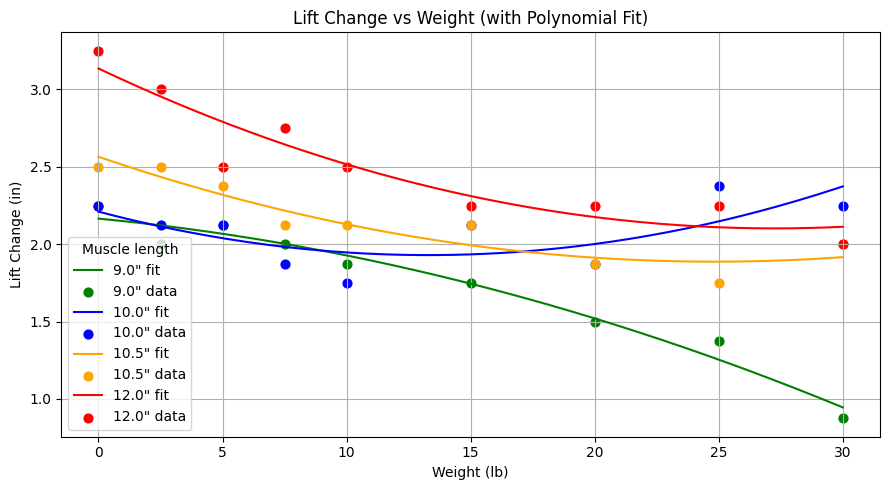

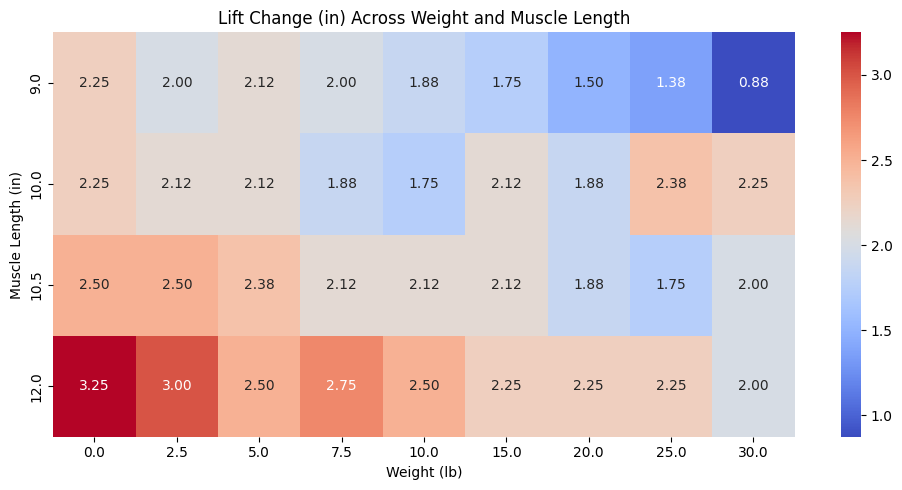

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/lukasmatousek/Desktop/programovani/ihmc/exoskeleton-charts/venv/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/Users/lukasmatousek/Desktop/programovani/ihmc/exoskeleton-charts/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 339, in dispatch_control
    await self.process_control(msg)
  File "/Users/lukasmatousek/Desktop/programovani/ihmc/exoskeleton-charts/venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 345, in process_control
    idents, msg = self.session.feed_identities(msg, copy=False)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lukasmatousek/Desktop/programovani/ihmc/exoskeleton-charts/venv/lib/python3.12/site-packages/jupyter_client/session.py", line 994, in feed_identities
    raise ValueError(msg)
ValueError: DELIM not in msg_list
ERROR:torn

In [ ]:
plot_charts()